## Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Import Data

In [49]:
df = pd.read_csv("MoneyLover-2022-09-11.csv")

#### Info of the data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2683 non-null   int64 
 1   Note            1665 non-null   object
 2   Amount          2683 non-null   int64 
 3   Category        2683 non-null   object
 4   Account         2683 non-null   object
 5   Currency        2683 non-null   object
 6   Date            2683 non-null   object
 7   Event           2683 non-null   object
 8   Exclude Report  2683 non-null   bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 170.4+ KB


#### Look at data

In [51]:
df.head()

,ID,Note,Amount,Category,Account,Currency,Date,Event,Exclude Report
0,1,Raga Titan watch for Aai,-5200,Gifts & Donations,Salary Account,INR,09/09/2022,No,False
1,2,TP,-600,Insurances,Salary Account,INR,09/09/2022,No,False
2,3,Shirt from Didu s money,-2300,Clothing,Salary Account,INR,09/09/2022,No,False
3,4,Panner,-70,Food & Beverage,Salary Account,INR,08/09/2022,No,False
4,5,Baba Recharge,-210,Phone Bill,Salary Account,INR,05/09/2022,No,False


In [13]:
df.drop("Note", axis="columns")

,ID,Amount,Category,Account,Currency,Date,Event,Exclude Report
0,1,-5200,Gifts & Donations,Salary Account,INR,09/09/2022,No,False
1,2,-600,Insurances,Salary Account,INR,09/09/2022,No,False
2,3,-2300,Clothing,Salary Account,INR,09/09/2022,No,False
3,4,-70,Food & Beverage,Salary Account,INR,08/09/2022,No,False
4,5,-210,Phone Bill,Salary Account,INR,05/09/2022,No,False
...,...,...,...,...,...,...,...,...
2678,2679,-100,J1,Cash,INR,06/11/2016,No,False
2679,2680,-100,Books,Cash,INR,05/11/2016,No,False
2680,2681,-100,J1,Cash,INR,05/11/2016,No,False
2681,2682,-150,Transportation,Cash,INR,04/11/2016,No,False


In [143]:
def wrangle(filepath):
    # Read CSV to file
    df = pd.read_csv(filepath)
    
    # Drop extra columns
    df.drop(columns=["Note", "Exclude Report"], inplace=True)
    
    # Subset to Inflow and Outflow
    #df[["Inflow", "Outflow" ]] = df["Amount"] < 0 & df["Amount"] > 0
    
    #df["Outflow"] = df["Amount"] > 0
    return df

In [144]:
df = wrangle("MoneyLover-2022-09-11.csv")
#print("df shape:", df.shape)
df.head()

,ID,Amount,Category,Account,Currency,Date,Event
0,1,-5200,Gifts & Donations,Salary Account,INR,09/09/2022,No
1,2,-600,Insurances,Salary Account,INR,09/09/2022,No
2,3,-2300,Clothing,Salary Account,INR,09/09/2022,No
3,4,-70,Food & Beverage,Salary Account,INR,08/09/2022,No
4,5,-210,Phone Bill,Salary Account,INR,05/09/2022,No


In [154]:
df.loc[df["Amount"] >= 0, "Flag"] = "Inflow"
df.loc[df["Amount"] <= 0, "Flag"] = "Outflow"

In [157]:
df_Inflow = df[df["Flag"]=="Inflow"] 
df_Outflow = df[df["Flag"]=="Outflow"] 

In [158]:
df_Inflow.head()

,ID,Amount,Category,Account,Currency,Date,Event,Inflow,Outflow,Flag
14,15,68000,Salary,Salary Account,INR,30/08/2022,No,,,Inflow
18,19,1500,Gifts,Salary Account,INR,27/08/2022,No,,,Inflow
32,33,660,Dividend,Salary Account,INR,12/08/2022,No,,,Inflow
35,36,1000,Gifts,Salary Account,INR,11/08/2022,No,,,Inflow
36,37,500,Gifts,Salary Account,INR,11/08/2022,No,,,Inflow


In [59]:
df["Category"].value_counts().head()

Food & Beverage      516
J1                   415
Petrol               230
Transportation       149
Bills & Utilities    109
Name: Category, dtype: int64

In [21]:
df["Account"].value_counts().head()

Salary Account    1730
Cash               946
FD                   7
Name: Account, dtype: int64

In [159]:
df_Inflow["Amount"].describe()

count       322.000000
mean       8502.080745
std       16697.986462
min          60.000000
25%        1000.000000
50%        2200.000000
75%        6000.000000
max      121700.000000
Name: Amount, dtype: float64

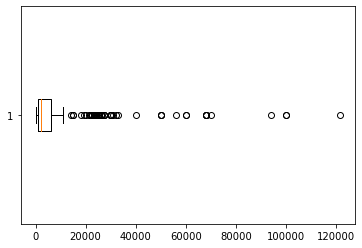

In [163]:
plt.boxplot(df_Inflow["Amount"], vert=False);

In [164]:
mean_price_by_state = df_Inflow.groupby("Category")["Amount"].mean().sort_values(ascending=False)
mean_price_by_state

Category
Salary             22439.932203
Withdrawal         18535.714286
Selling            10090.000000
Gifts               9405.000000
Debt                8228.571429
Interest Money      6719.000000
Debt Collection     6417.380952
Other Income        4032.787879
Baba                2653.750000
Self                1900.000000
Dividend             510.416667
Name: Amount, dtype: float64

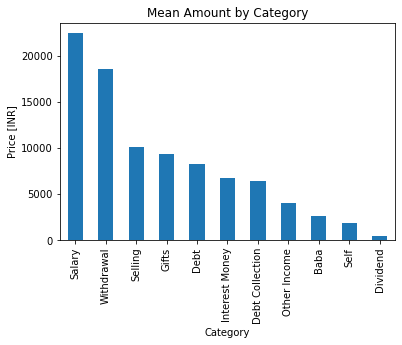

In [165]:
mean_price_by_state.plot(
    kind="bar",
    xlabel="Category",
    ylabel="Price [INR]",
    title="Mean Amount by Category"
);

In [70]:
df["Amount"].unique()

array([  -5200,    -600,   -2300,     -70,    -210,    -200,   -3000,
         -5000,  -10000,  -40000,    -301,   -6090,   68000,    -500,
          -100,    -250,    1500,    -300,    -900,   -3200,    -240,
         -1150,   -7800,    -550,    -150,   -1000,     660,    -630,
         -2500,    1000,     500,    -350,     110,    -110,    -400,
          -800,   -5500,   -6300,    -330,    -700,    -260,   -2000,
          -870,   -1700,    -160,   -1600,   50000,  -50000,    -155,
         -1680,    -120,   -1965,     -10,    2000,    -320,    -360,
         -1300,     -50,    -450,    -205,   -1020,    -650,    -170,
        100000,    -975, -100000,  121700,    -455,   -1100,     975,
          1150,   30000,    -130,   -6000,  -30000,   70000,    -230,
         -1250,   -3100,   -4000,   -2200,    5000,    -425,    -675,
         -1800,  -32000,    -610,    -180,     800,   10000,   -7450,
         -2475,  -33500,   93900,     480,    -193,    -185,    -175,
          -224,     

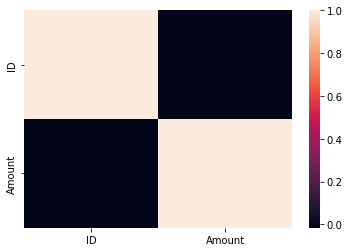

In [66]:
corr = df.select_dtypes("int64").corr()
sns.heatmap(corr);

In [67]:
sorted(df.columns)

['Account', 'Amount', 'Category', 'Currency', 'Date', 'Event', 'ID']

In [89]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2683 non-null   int64 
 1   Amount    2683 non-null   int64 
 2   Category  2683 non-null   object
 3   Account   2683 non-null   object
 4   Currency  2683 non-null   object
 5   Date      2683 non-null   object
 6   Event     2683 non-null   object
dtypes: int64(2), object(5)
memory usage: 146.9+ KB


In [119]:
df.dtypes

ID           int64
Amount      object
Category    object
Account     object
Currency    object
Date        object
Event       object
dtype: object

In [125]:
df.head(20)

,ID,Amount,Category,Account,Currency,Date,Event,lat,lon
0,1,-5200,Gifts & Donations,Salary Account,INR,09/09/2022,No,,5200
1,2,-600,Insurances,Salary Account,INR,09/09/2022,No,,600
2,3,-2300,Clothing,Salary Account,INR,09/09/2022,No,,2300
3,4,-70,Food & Beverage,Salary Account,INR,08/09/2022,No,,70
4,5,-210,Phone Bill,Salary Account,INR,05/09/2022,No,,210
5,6,-200,Petrol,Salary Account,INR,05/09/2022,No,,200
6,7,-200,Gifts & Donations,Salary Account,INR,04/09/2022,No,,200
7,8,-3000,Phone Bill,Salary Account,INR,02/09/2022,No,,3000
8,9,-5000,PPF,Salary Account,INR,02/09/2022,No,,5000
9,10,-5000,Baba,Salary Account,INR,01/09/2022,No,,5000
